In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, f1_score, recall_score, accuracy_score, precision_score,  confusion_matrix, roc_auc_score, roc_curve, auc

In [55]:
data = pd.read_csv('data/UCI_Credit_Card.csv')

In [56]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [57]:
data.shape

(30000, 25)

In [58]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [60]:
data['default.payment.next.month'].value_counts()

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

# Informations personnelles du client
- ID : Identifiant unique de chaque client.

- LIMIT_BAL : Montant total du crédit accordé (en dollars NT). Cela inclut les lignes de crédit individuelles, familiales ou supplémentaires.

- SEXE : Sexe du client :

    1 = homme

    2 = femme

- ÉDUCATION : Niveau d'éducation du client :

    1 = études supérieures (graduate school)

    2 = université

    3 = lycée

    4 = autre

    5 & 6 = inconnu ou non spécifié

- MARIAGE : État matrimonial :

    1 = marié(e)

    2 = célibataire

    3 = autres (divorcé(e), séparé(e), etc.)

- ÂGE : Âge du client en années.

# Historique de remboursement (PAY_X)
    Ces variables indiquent la situation de remboursement pour chacun des 6 derniers mois (d’avril à septembre 2005) :

- PAY_0 : Statut en septembre 2005

- PAY_2 : Statut en août 2005

- PAY_3 : Statut en juillet 2005

- PAY_4 : Statut en juin 2005

- PAY_5 : Statut en mai 2005

- PAY_6 : Statut en avril 2005

Valeurs possibles :

    -1 = payé à temps

    0 = paiement effectué à l’échéance

    1 à 8 = nombre de mois de retard

    9 = 9 mois ou plus de retard

# Montants des relevés de factures (BILL_AMT_X)
    Ces variables donnent le montant dû à la fin de chaque mois :

- BILL_AMT1 : Septembre 2005

- BILL_AMT2 : Août 2005

- BILL_AMT3 : Juillet 2005

- BILL_AMT4 : Juin 2005

- BILL_AMT5 : Mai 2005

- BILL_AMT6 : Avril 2005

# Montants des paiements effectués (PAY_AMT_X)
 Ces colonnes indiquent combien le client a réellement payé pendant chacun de ces mois :

- PAY_AMT1 : Paiement en septembre 2005

- PAY_AMT2 : Paiement en août 2005

- PAY_AMT3 : Paiement en juillet 2005

- PAY_AMT4 : Paiement en juin 2005

- PAY_AMT5 : Paiement en mai 2005

- PAY_AMT6 : Paiement en avril 2005

# Variable cible
    default.payment.next.month : Indicateur si le client a fait défaut de paiement le mois suivant :

- 1 = le client n’a pas payé (défaut)

- 0 = le client a payé normalement

In [61]:
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [62]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [63]:
data.drop(columns='ID', inplace=True)

In [68]:
# Liste des colonnes PAY_X à convertir
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Convertir PAY_X en catégories
for col in pay_cols:
    data[col] = data[col].astype('category')

# Convertir les autres variables en catégories
data['SEX'] = data['SEX'].astype('category')
data['EDUCATION'] = data['EDUCATION'].astype('category')
data['MARRIAGE'] = data['MARRIAGE'].astype('category')
data['default.payment.next.month'] = data['default.payment.next.month'].astype('category')


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   LIMIT_BAL                   30000 non-null  float64 
 1   SEX                         30000 non-null  category
 2   EDUCATION                   30000 non-null  category
 3   MARRIAGE                    30000 non-null  category
 4   AGE                         30000 non-null  int64   
 5   PAY_0                       30000 non-null  category
 6   PAY_2                       30000 non-null  category
 7   PAY_3                       30000 non-null  category
 8   PAY_4                       30000 non-null  category
 9   PAY_5                       30000 non-null  category
 10  PAY_6                       30000 non-null  category
 11  BILL_AMT1                   30000 non-null  float64 
 12  BILL_AMT2                   30000 non-null  float64 
 13  BILL_AMT3       

In [81]:
num_var = data.select_dtypes(['float','int'])
cat_var = data.select_dtypes('category')


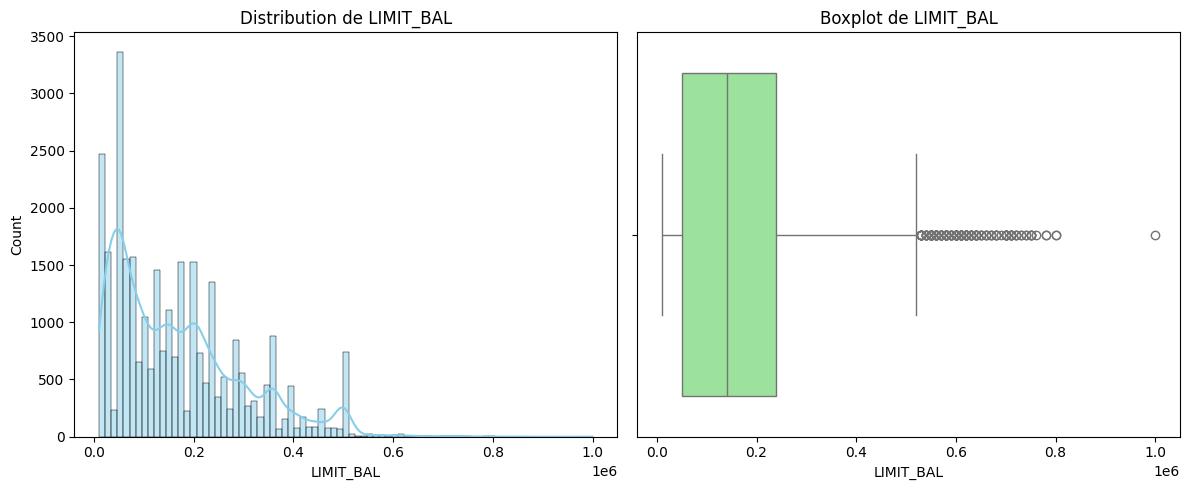

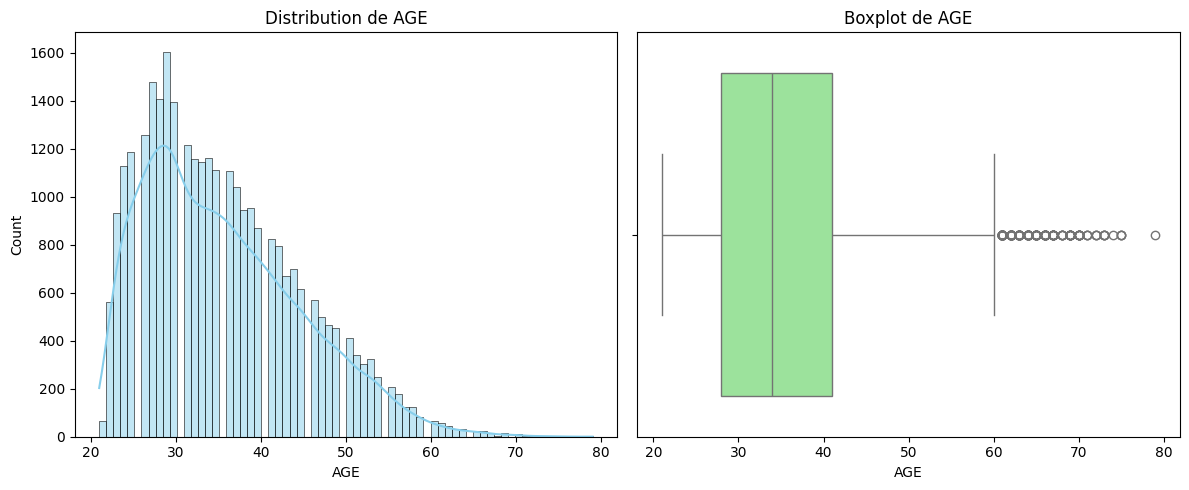

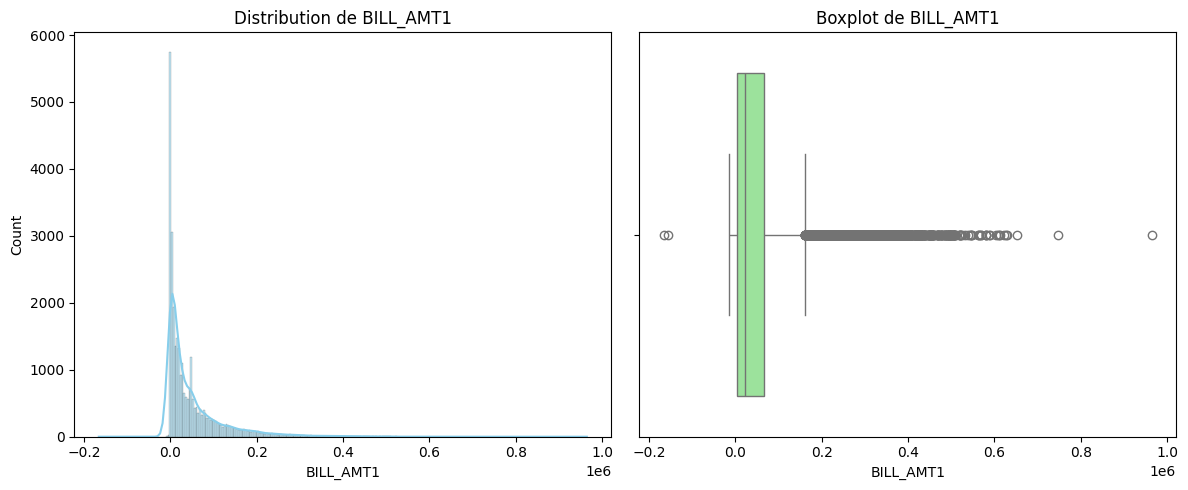

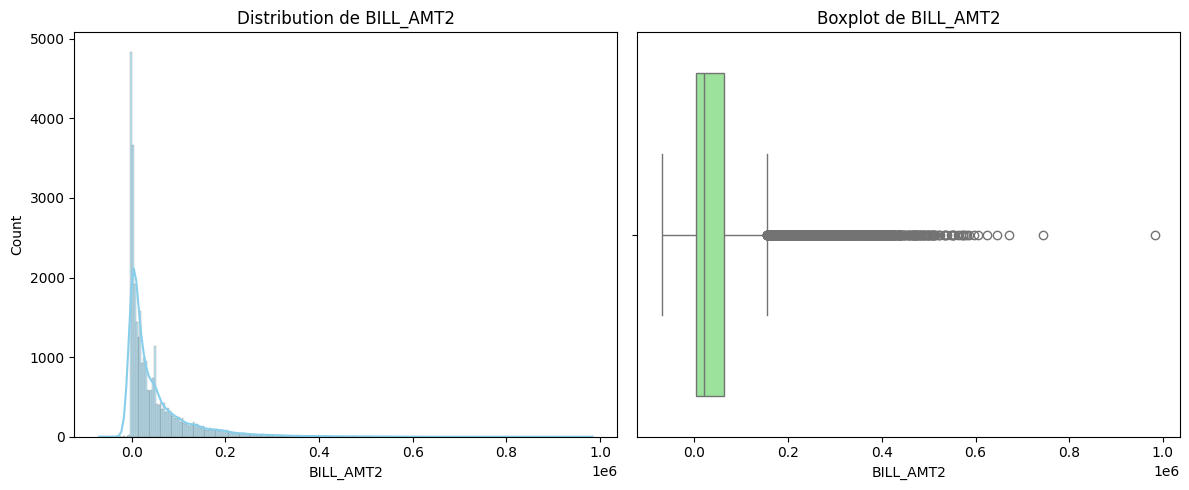

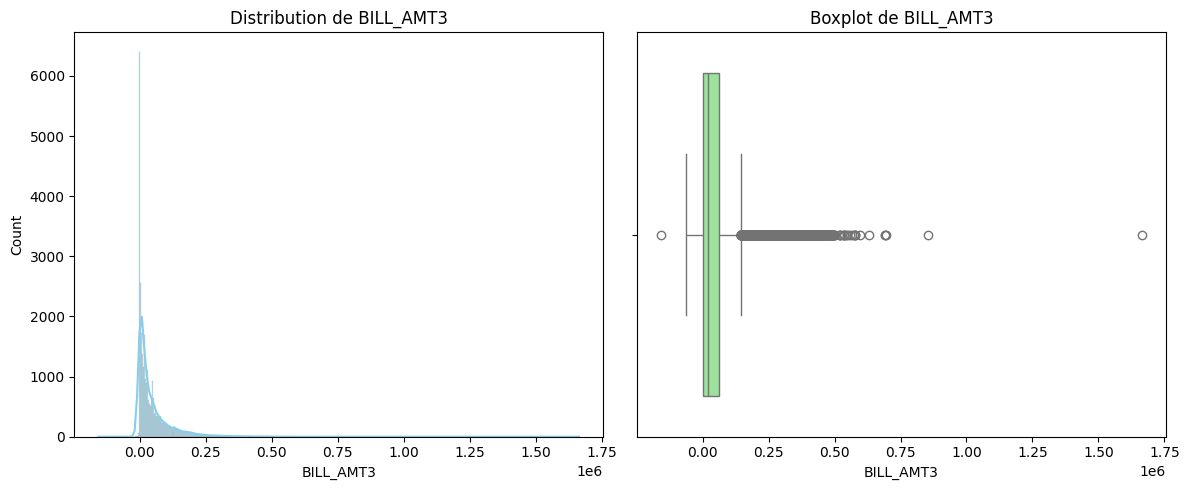

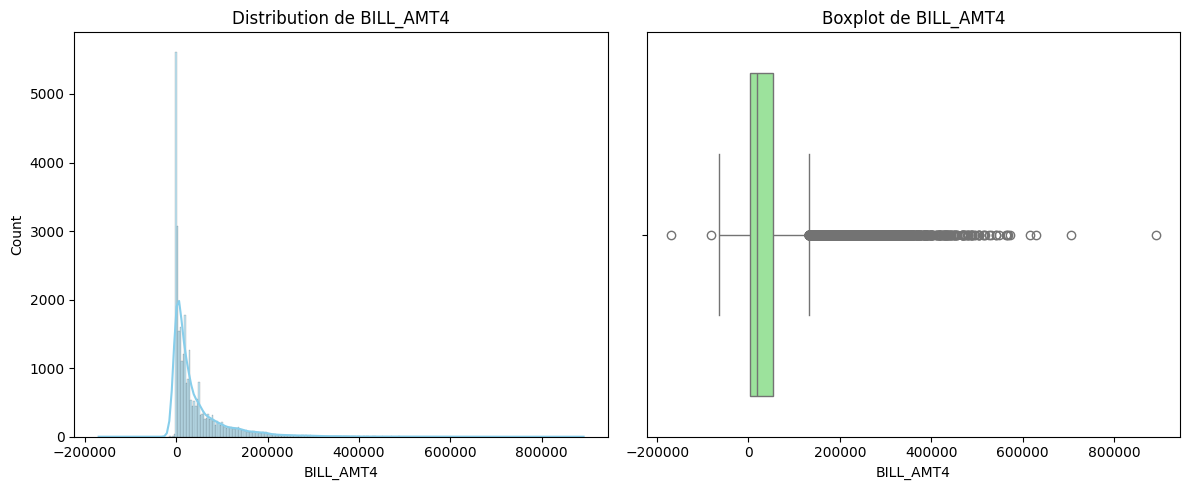

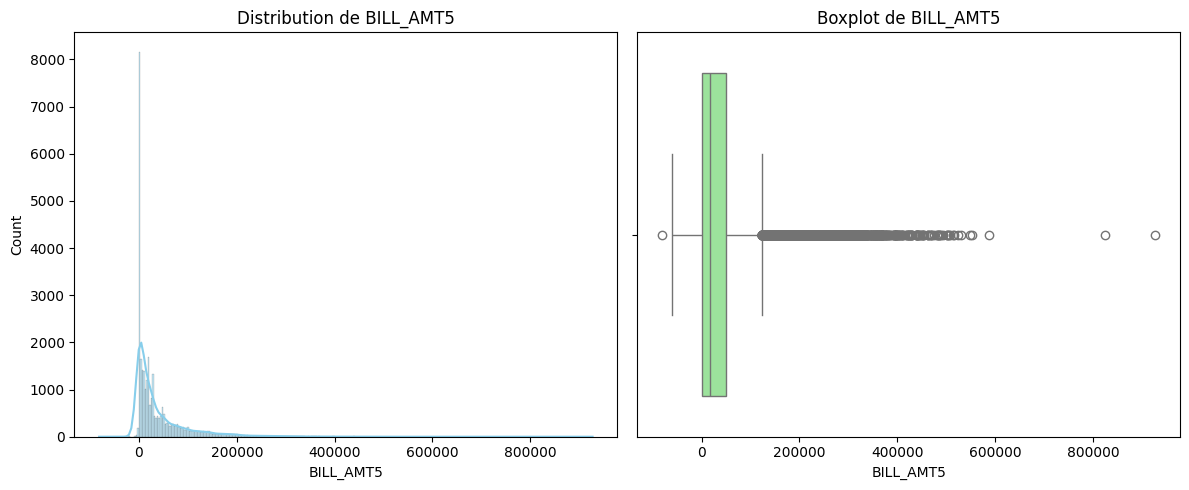

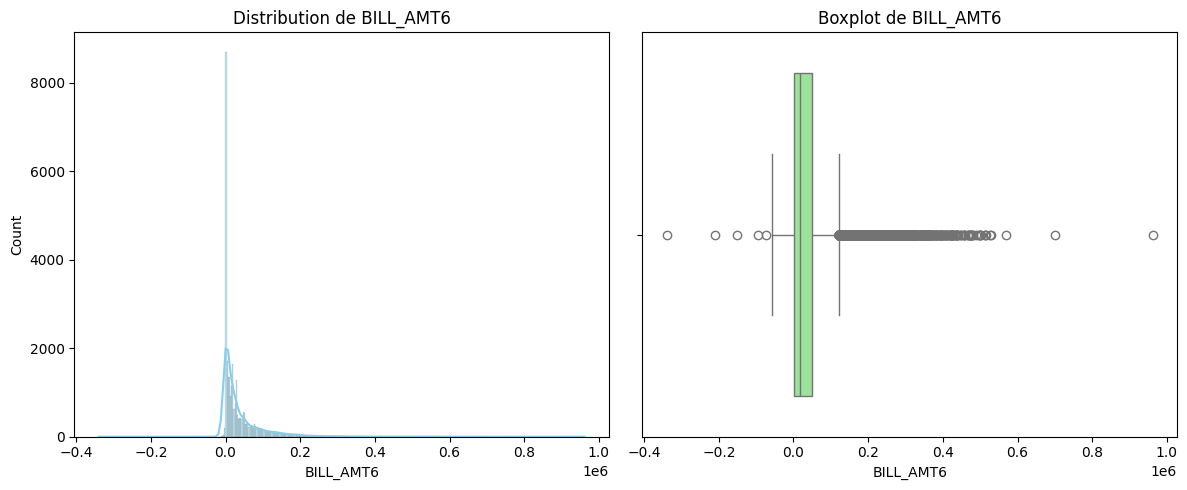

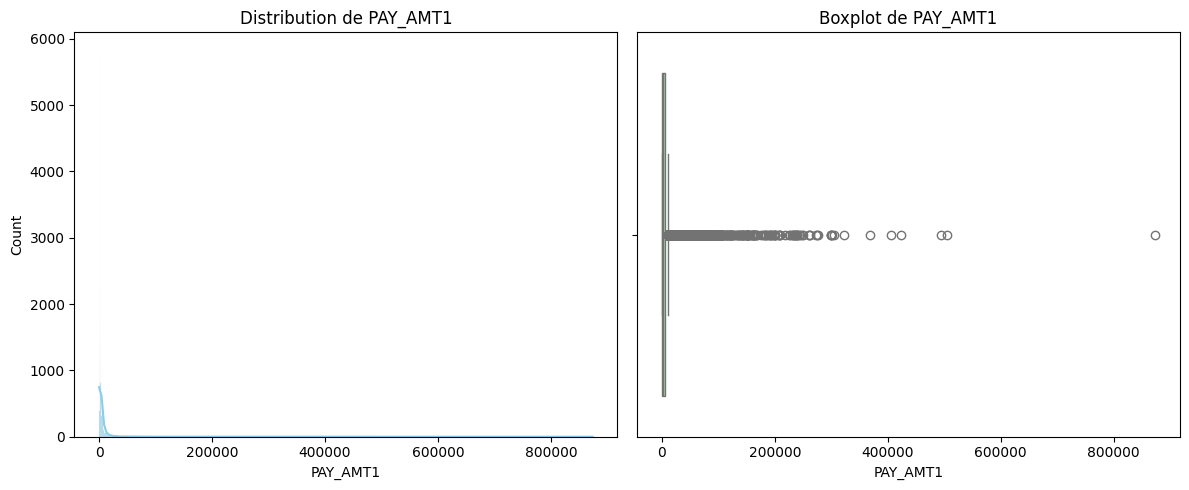

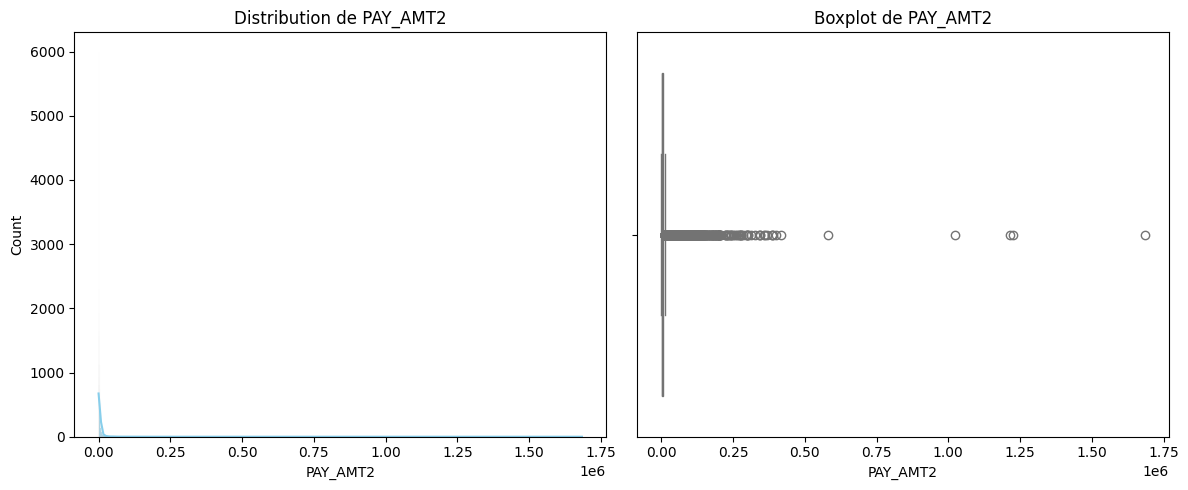

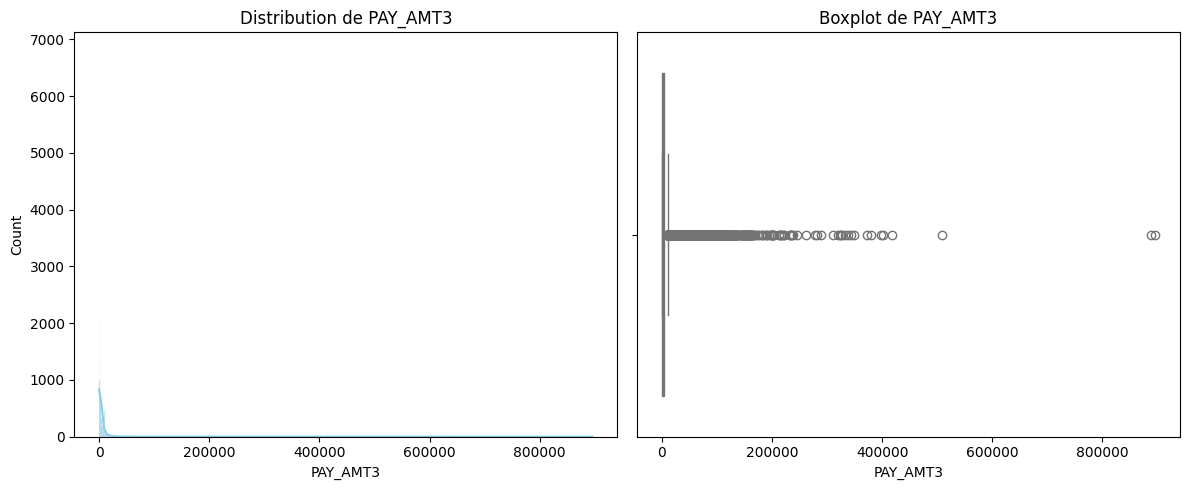

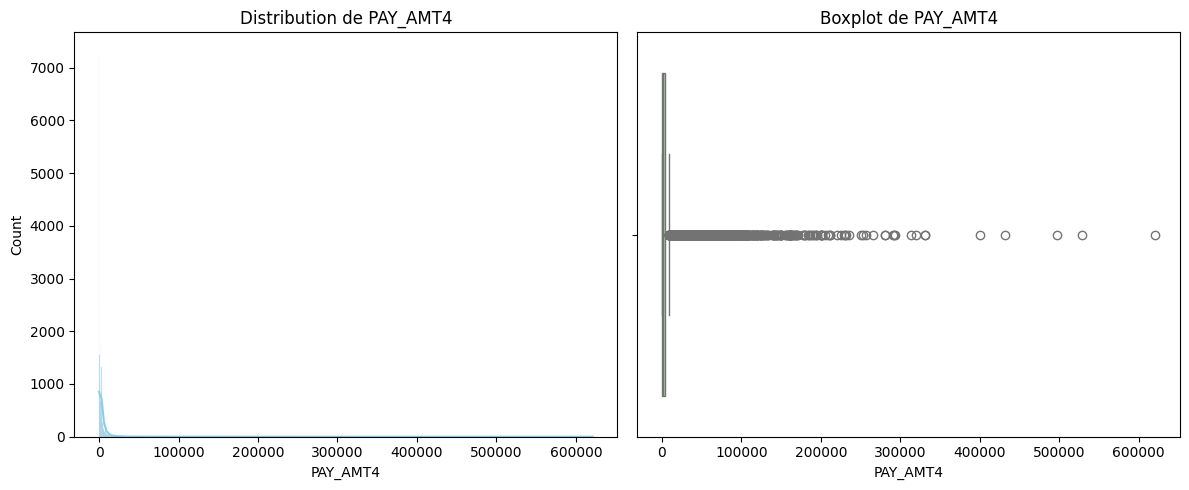

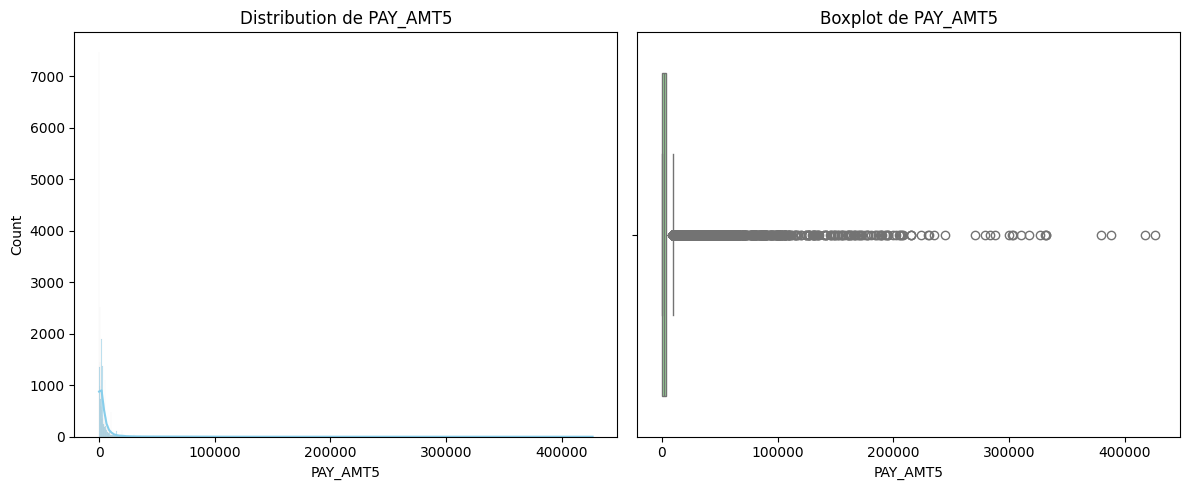

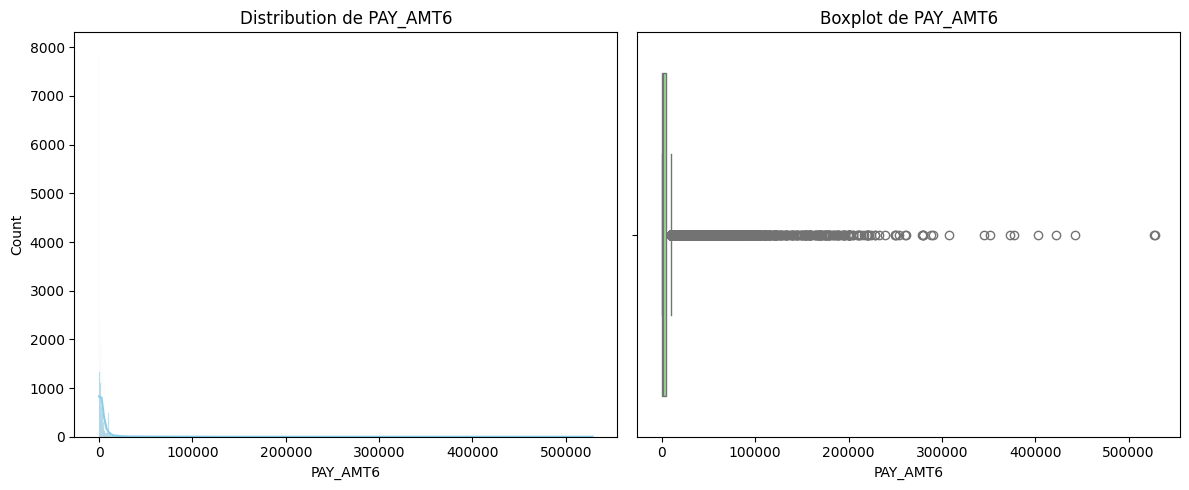

In [73]:
for var in num_var:
    plt.figure(figsize=(12,5))
    
    # Histogramme
    plt.subplot(1, 2, 1)
    sns.histplot(data[var], kde=True, color='skyblue')
    plt.title(f'Distribution de {var}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[var], color='lightgreen')
    plt.title(f'Boxplot de {var}')
    
    plt.tight_layout()
    plt.show()

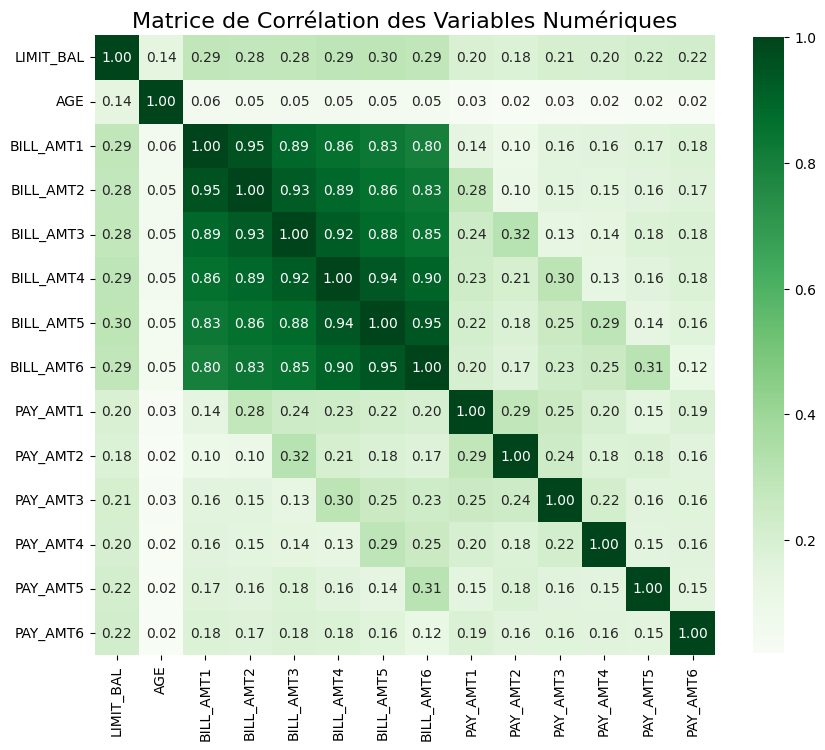

In [75]:
corr_matrix = num_var.corr()

plt.figure(figsize=(10, 10))

sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt=".2f", square=True, 
            cbar_kws={"shrink": 0.8}, annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.title("Matrice de Corrélation des Variables Numériques", fontsize=16)

plt.show()

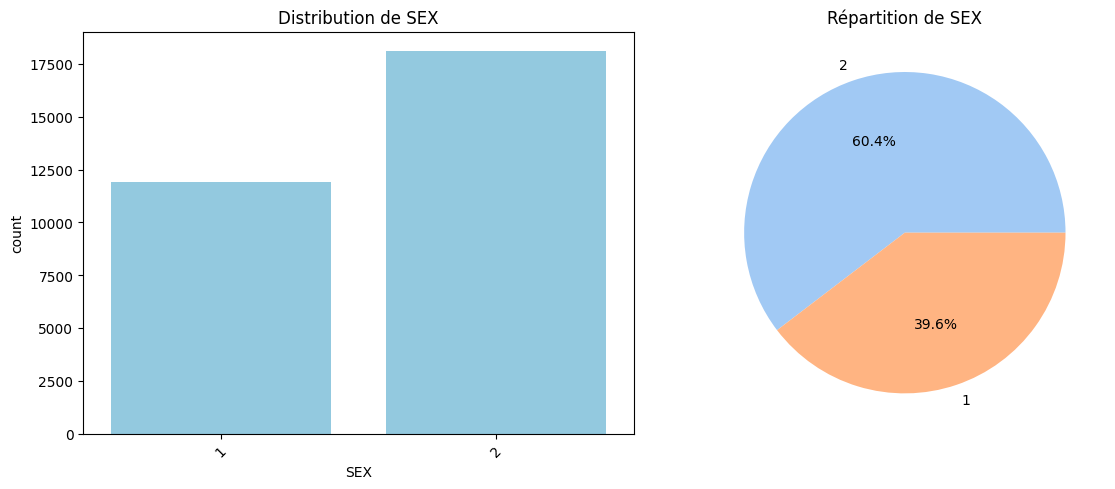

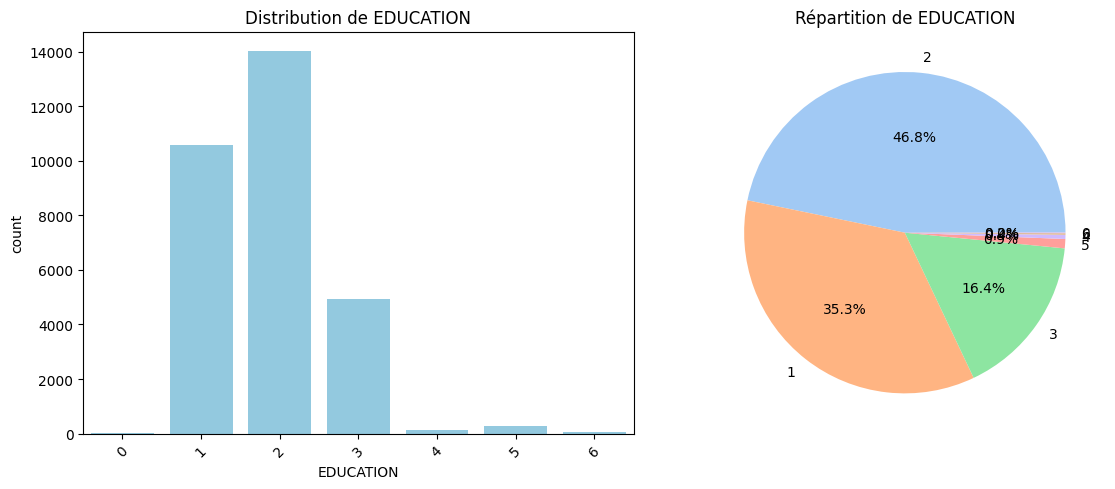

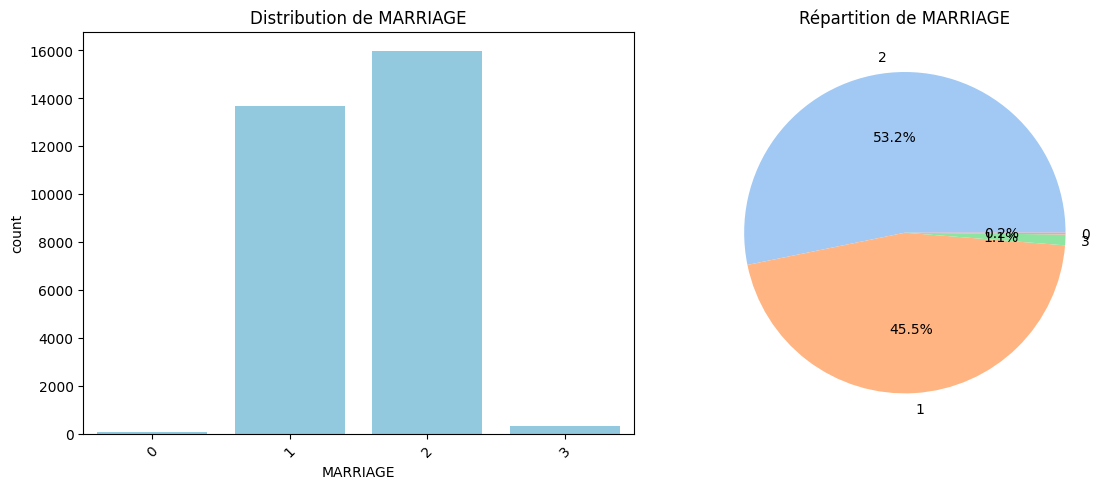

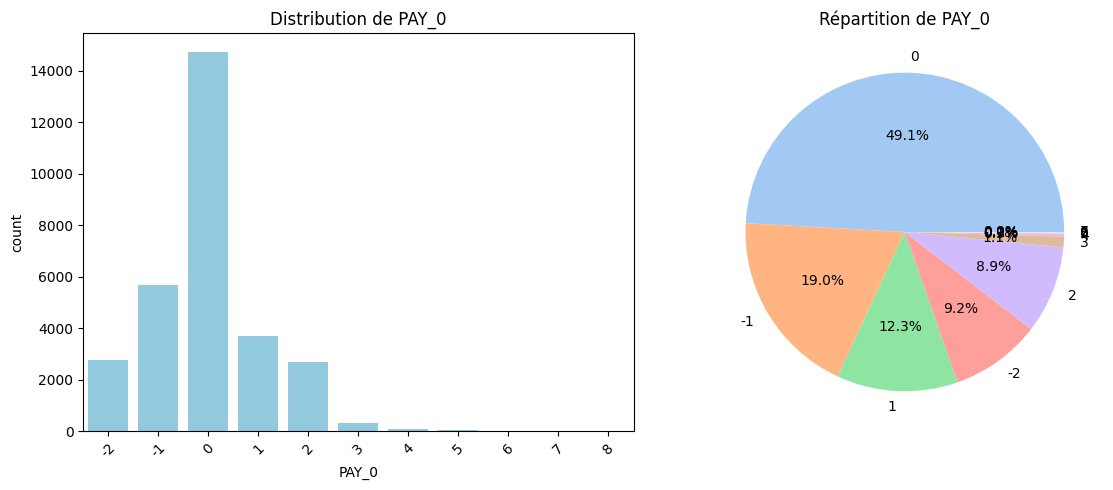

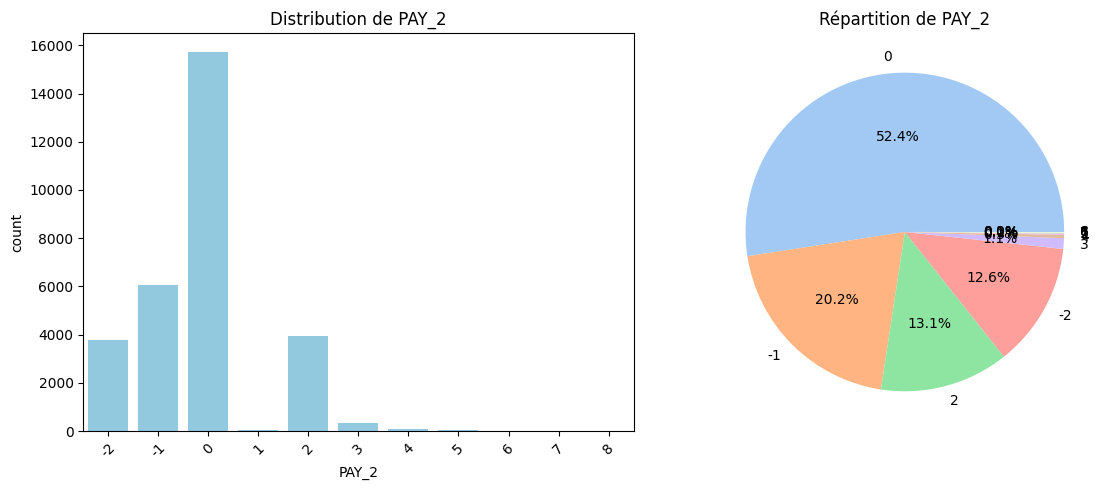

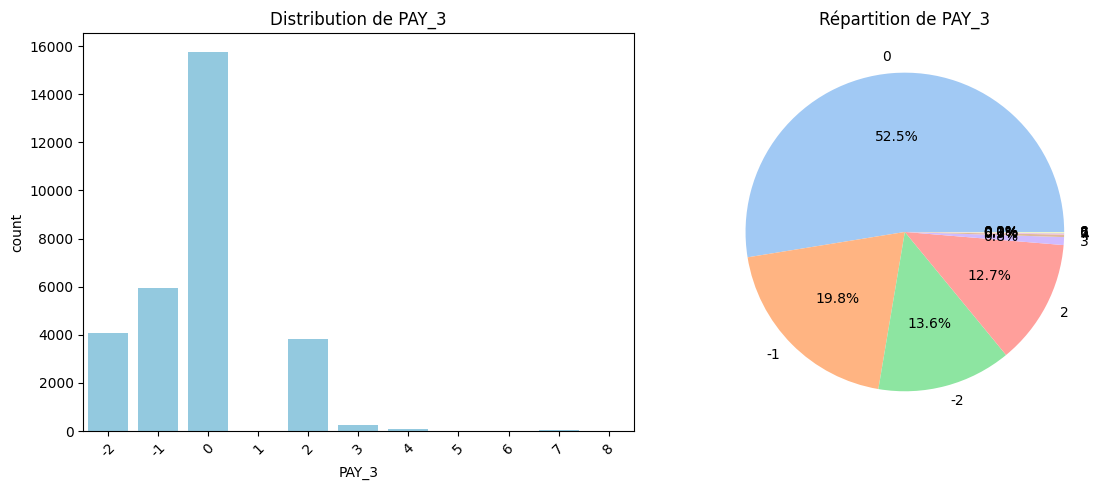

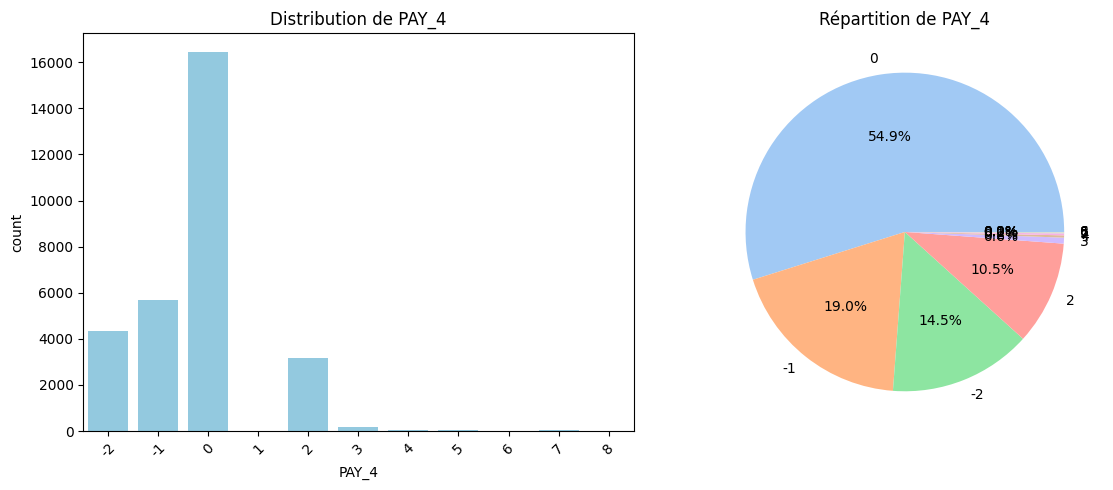

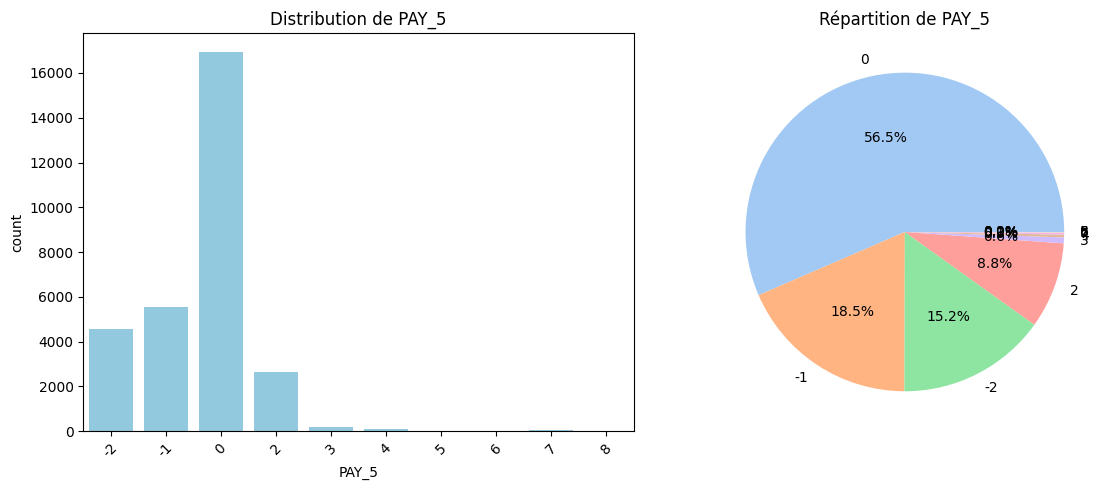

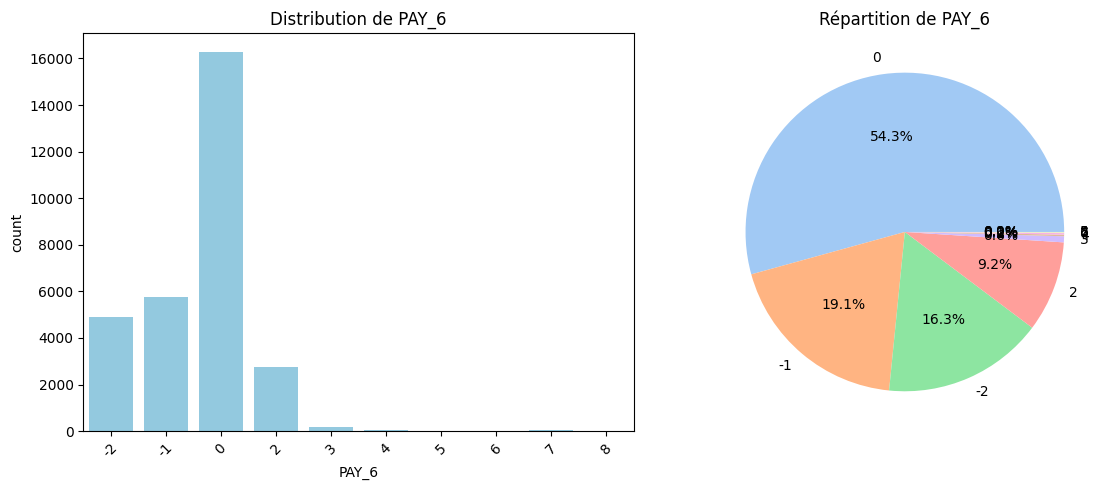

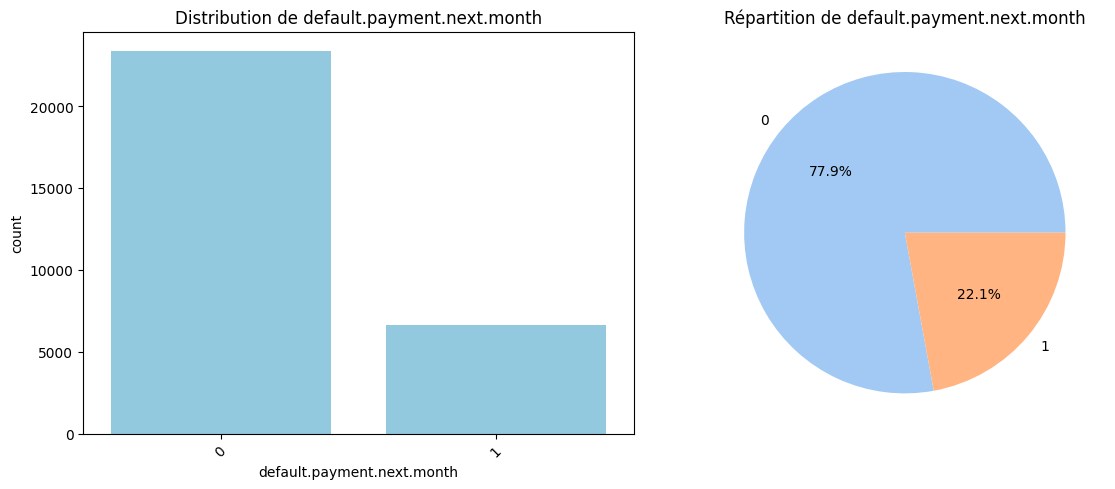

In [83]:
for var in cat_var:
    plt.figure(figsize=(12,5))
    
    # Barplot
    plt.subplot(1, 2, 1)
    sns.countplot(x=data[var], color='skyblue')
    plt.title(f'Distribution de {var}')
    plt.xticks(rotation=45)

    # Pieplot
    plt.subplot(1, 2, 2)
    data[var].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title(f'Répartition de {var}')
    plt.ylabel('')  # Enlève l'étiquette "y"

    plt.tight_layout()
    plt.show()

Test t pour LIMIT_BAL: Statistique t = 26.9085, P-value = 0.0000


C:\Users\PP\AppData\Local\Temp\ipykernel_4732\3569728906.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=var, data=data, palette='Set2')


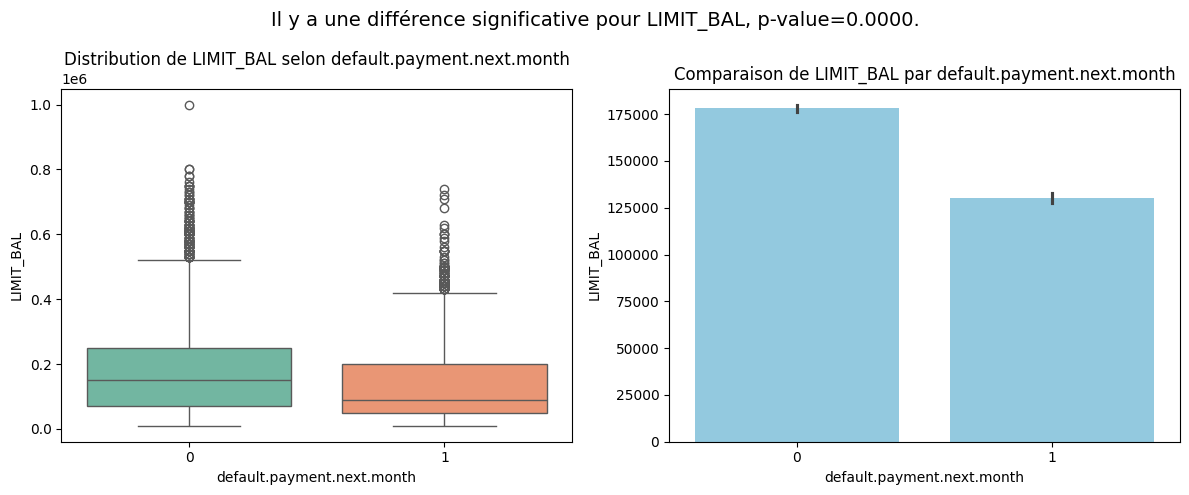

Test t pour AGE: Statistique t = -2.4059, P-value = 0.0161


C:\Users\PP\AppData\Local\Temp\ipykernel_4732\3569728906.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=var, data=data, palette='Set2')


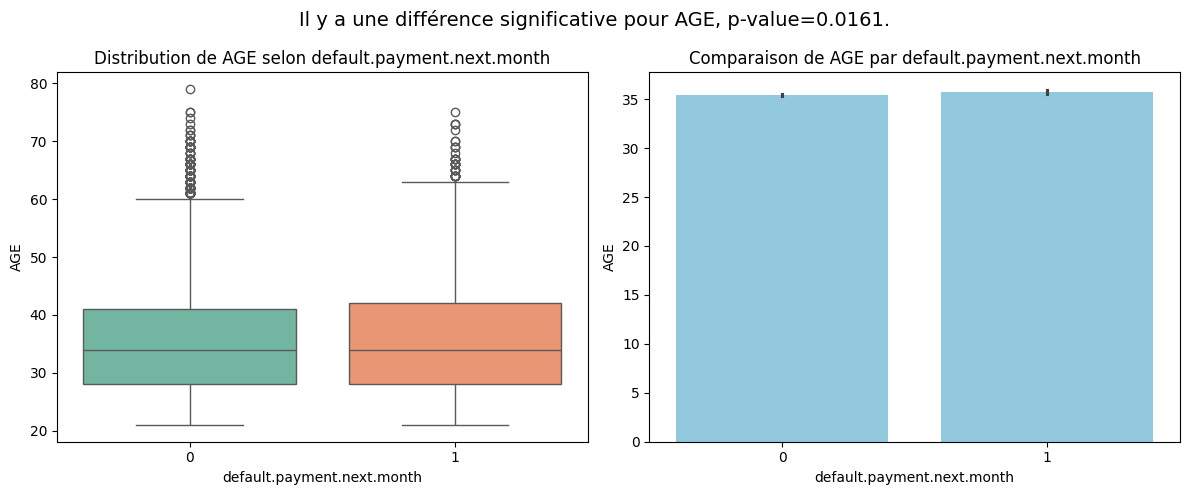

Test t pour BILL_AMT1: Statistique t = 3.4030, P-value = 0.0007


C:\Users\PP\AppData\Local\Temp\ipykernel_4732\3569728906.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=var, data=data, palette='Set2')


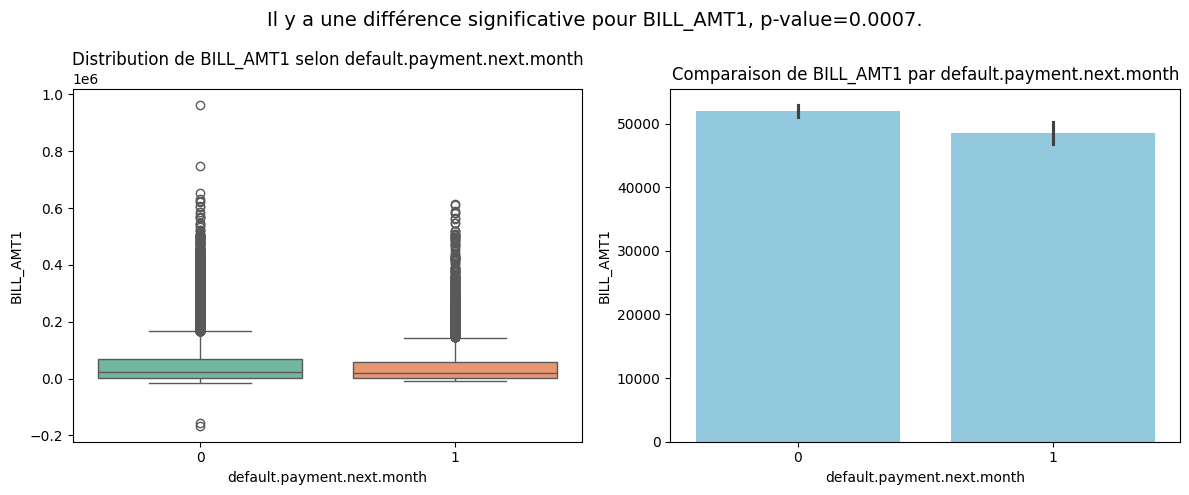

Test t pour BILL_AMT2: Statistique t = 2.4585, P-value = 0.0140


C:\Users\PP\AppData\Local\Temp\ipykernel_4732\3569728906.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=var, data=data, palette='Set2')


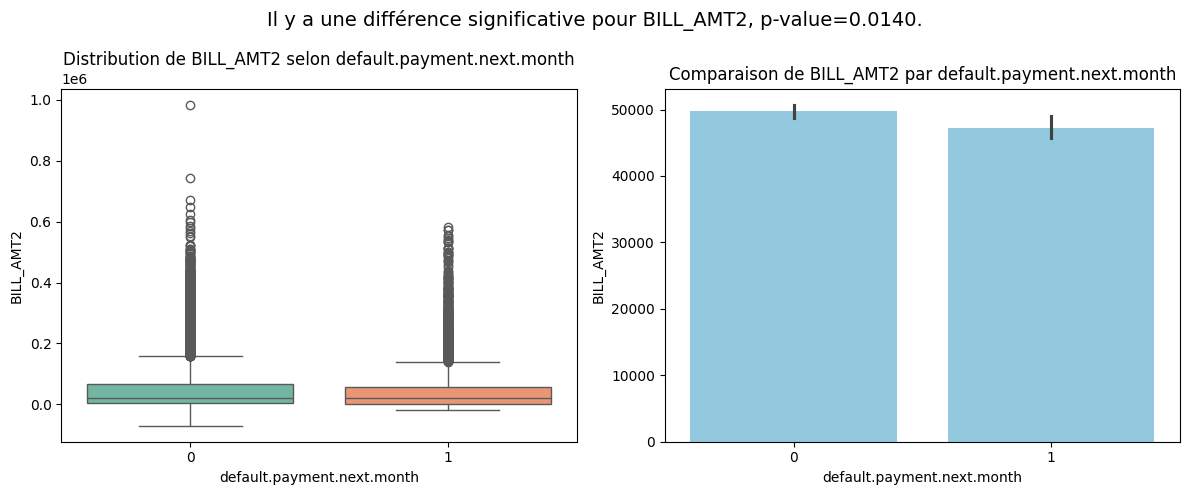

Test t pour BILL_AMT3: Statistique t = 2.4381, P-value = 0.0148


C:\Users\PP\AppData\Local\Temp\ipykernel_4732\3569728906.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=var, data=data, palette='Set2')


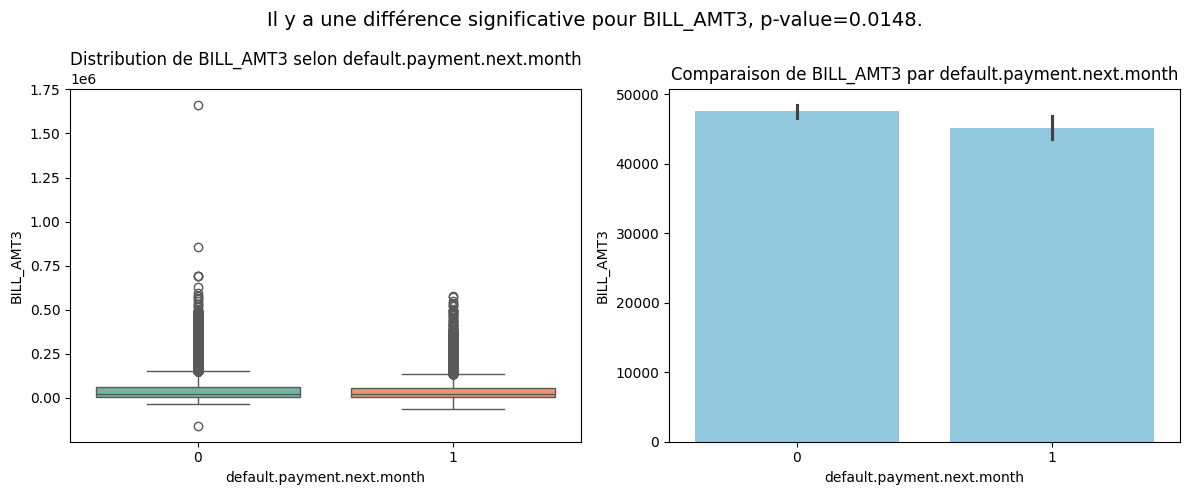

Test t pour BILL_AMT4: Statistique t = 1.7592, P-value = 0.0786


C:\Users\PP\AppData\Local\Temp\ipykernel_4732\3569728906.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=var, data=data, palette='Set2')


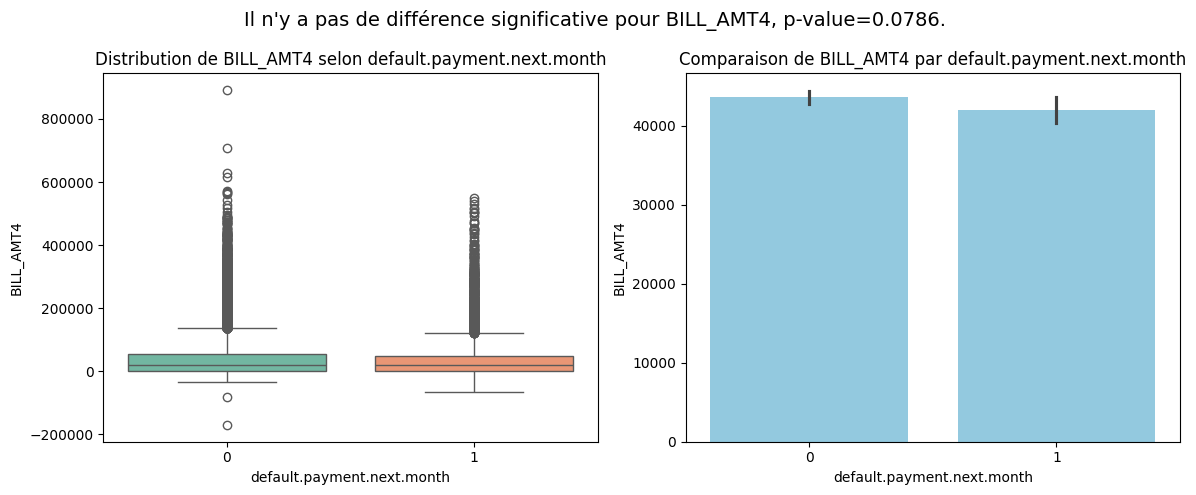

Test t pour BILL_AMT5: Statistique t = 1.1709, P-value = 0.2416


C:\Users\PP\AppData\Local\Temp\ipykernel_4732\3569728906.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=var, data=data, palette='Set2')


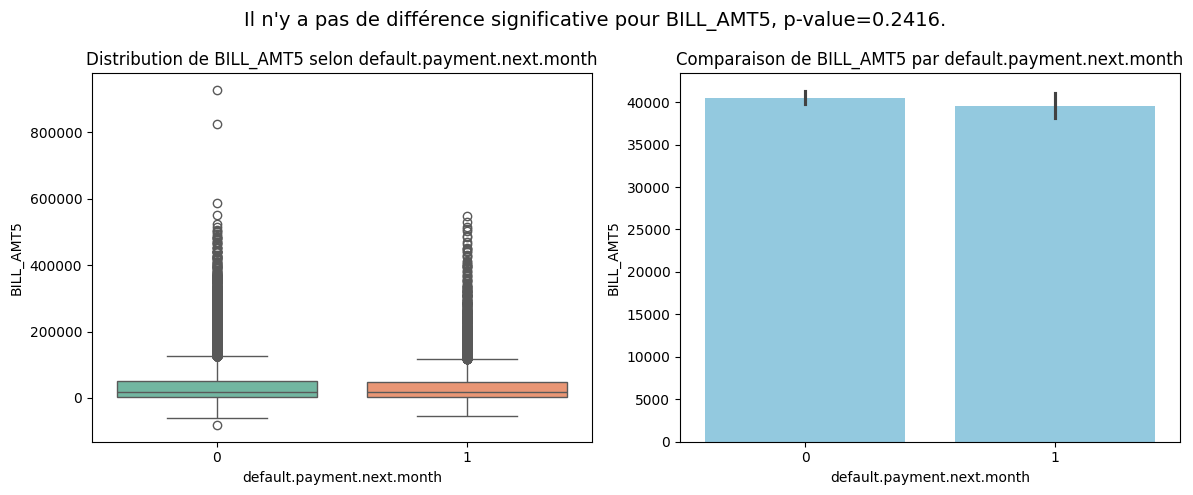

Test t pour BILL_AMT6: Statistique t = 0.9305, P-value = 0.3521


C:\Users\PP\AppData\Local\Temp\ipykernel_4732\3569728906.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=var, data=data, palette='Set2')


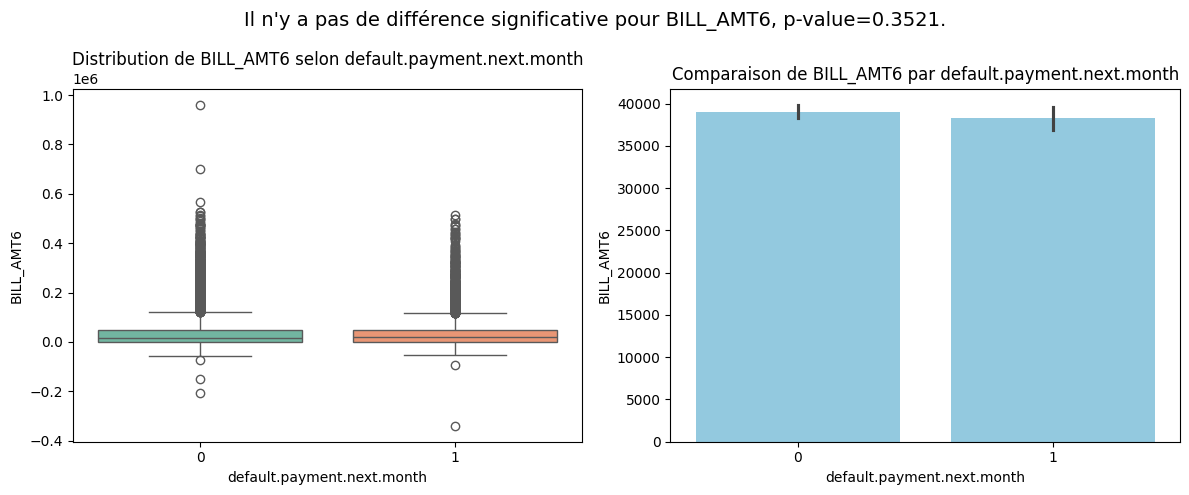

Test t pour PAY_AMT1: Statistique t = 12.6651, P-value = 0.0000


C:\Users\PP\AppData\Local\Temp\ipykernel_4732\3569728906.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=var, data=data, palette='Set2')


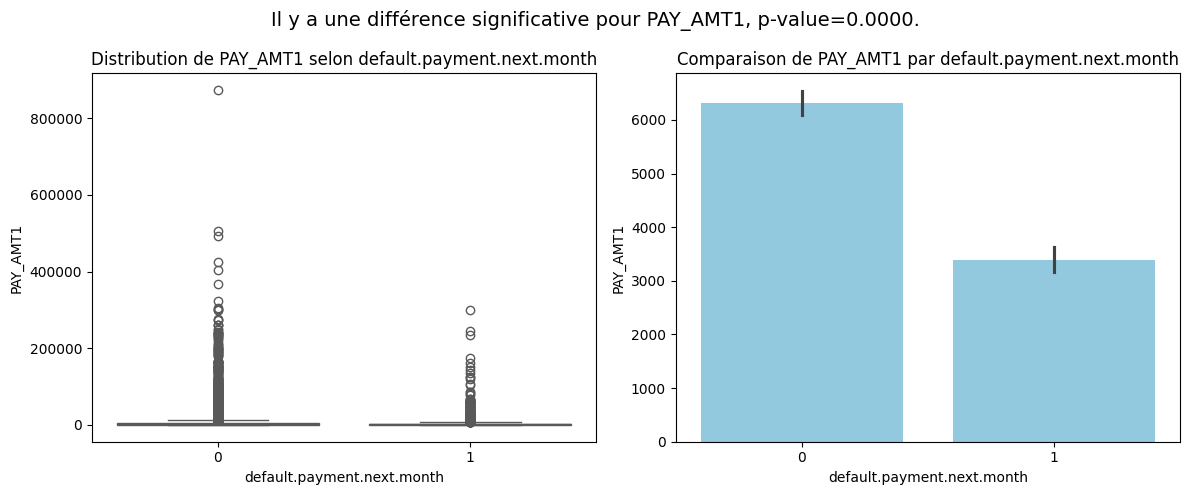

Test t pour PAY_AMT2: Statistique t = 10.1632, P-value = 0.0000


C:\Users\PP\AppData\Local\Temp\ipykernel_4732\3569728906.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=var, data=data, palette='Set2')


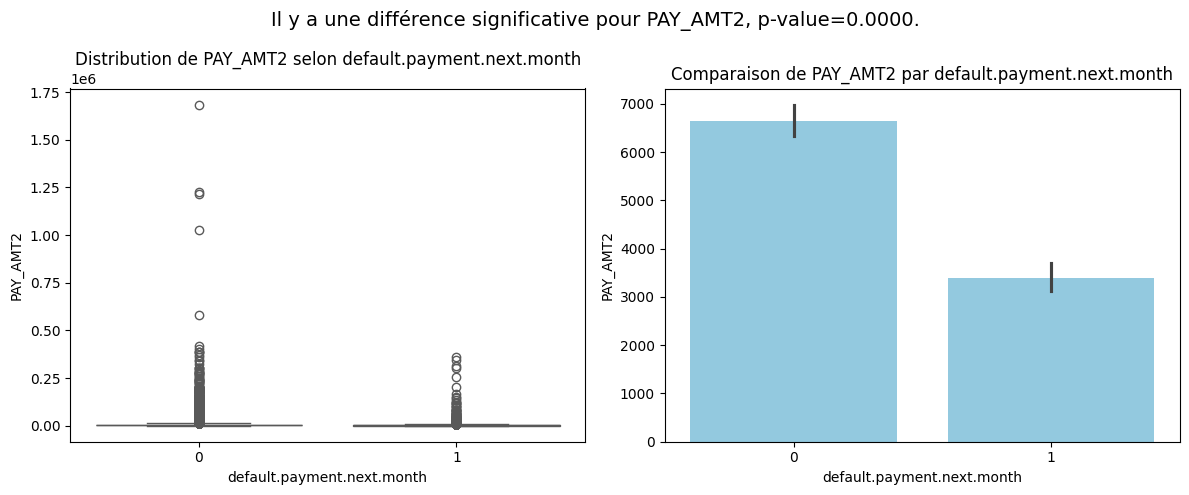

Test t pour PAY_AMT3: Statistique t = 9.7580, P-value = 0.0000


C:\Users\PP\AppData\Local\Temp\ipykernel_4732\3569728906.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=var, data=data, palette='Set2')


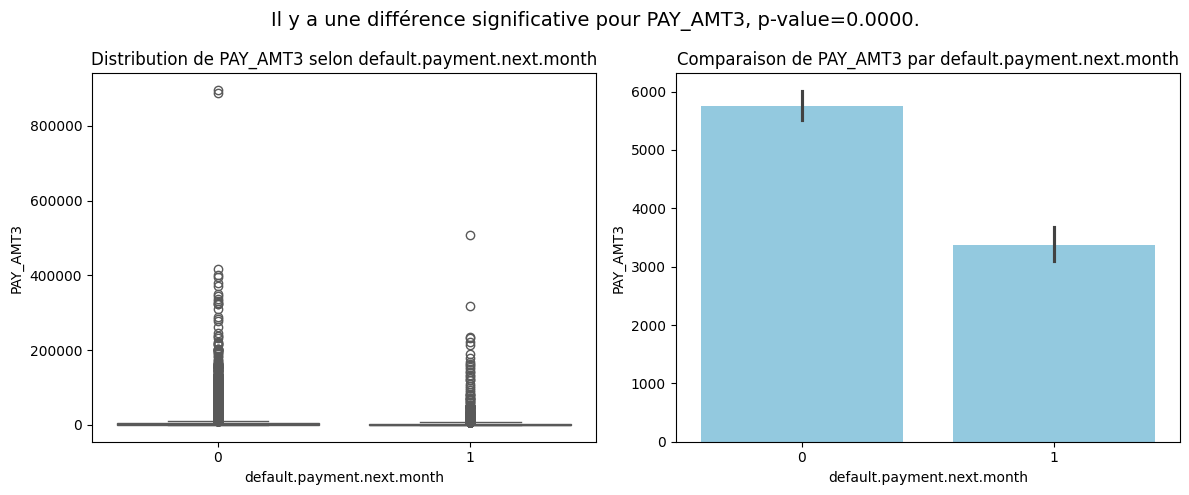

Test t pour PAY_AMT4: Statistique t = 9.8584, P-value = 0.0000


C:\Users\PP\AppData\Local\Temp\ipykernel_4732\3569728906.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=var, data=data, palette='Set2')


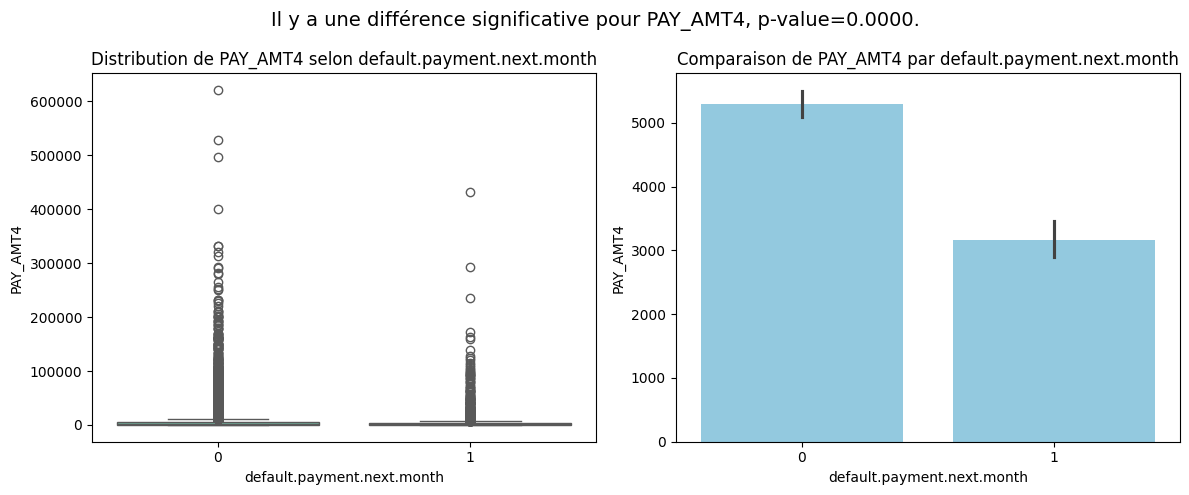

Test t pour PAY_AMT5: Statistique t = 9.5619, P-value = 0.0000


C:\Users\PP\AppData\Local\Temp\ipykernel_4732\3569728906.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=var, data=data, palette='Set2')


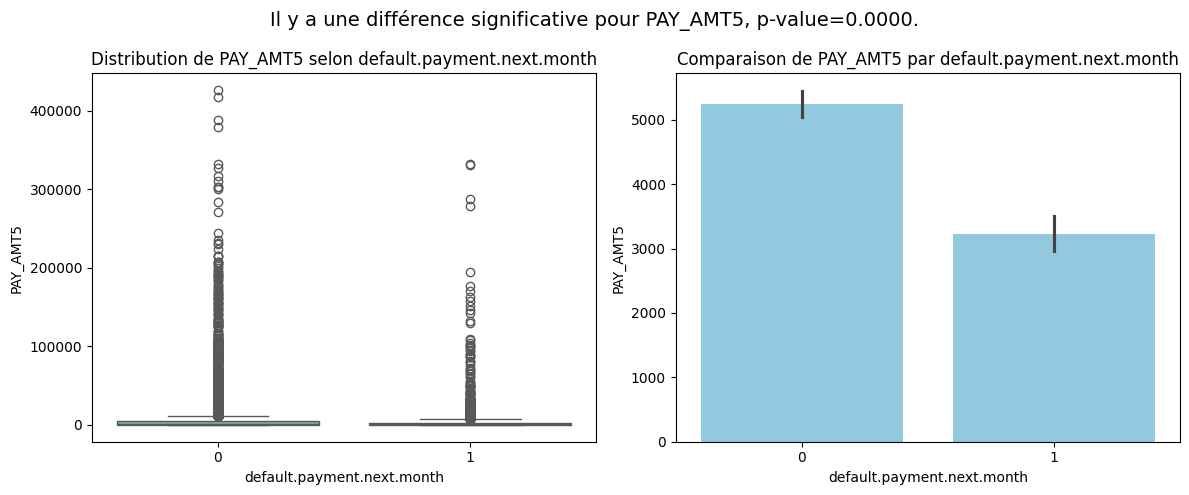

Test t pour PAY_AMT6: Statistique t = 9.2244, P-value = 0.0000


C:\Users\PP\AppData\Local\Temp\ipykernel_4732\3569728906.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=var, data=data, palette='Set2')


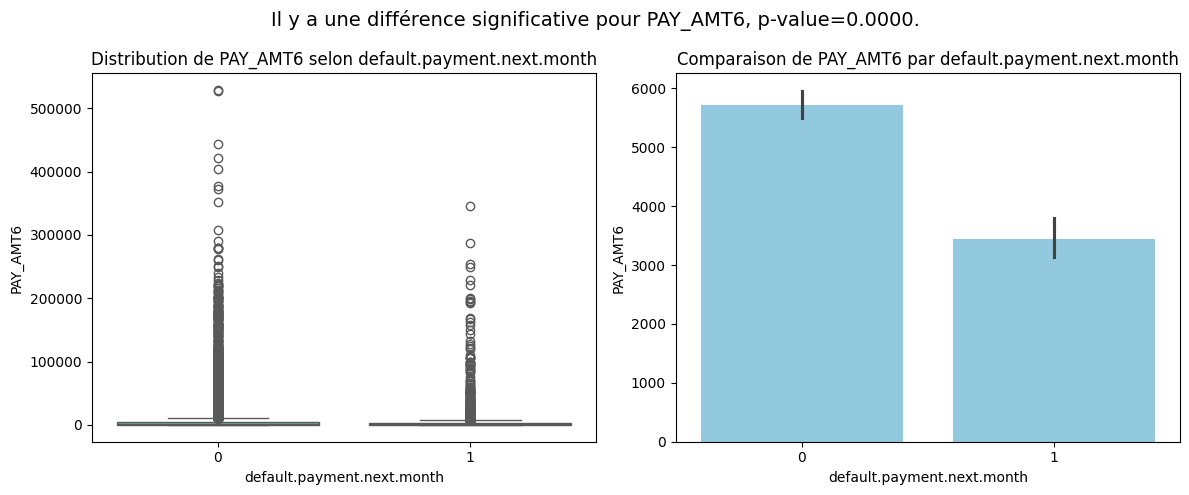

In [84]:
from scipy.stats import ttest_ind


for var in num_var:
    plt.figure(figsize=(12, 5))
    
    group1 = data[data['default.payment.next.month'] == 0][var]
    group2 = data[data['default.payment.next.month'] == 1][var]
    
    if len(group1) > 1 and len(group2) > 1 and group1.nunique() > 1 and group2.nunique() > 1:
        stat, p_value = ttest_ind(group1.dropna(), group2.dropna(), nan_policy='omit')
    else:
        stat = np.nan
    
    print(f"Test t pour {var}: Statistique t = {stat:.4f}, P-value = {p_value:.4f}")
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x='default.payment.next.month', y=var, data=data, palette='Set2')
    plt.title(f'Distribution de {var} selon default.payment.next.month')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x='default.payment.next.month', y=var, data=data, color='skyblue')
    plt.title(f'Comparaison de {var} par default.payment.next.month')
    
    if p_value is not np.nan and p_value < 0.05:
        plt.suptitle(f'Il y a une différence significative pour {var}, p-value={p_value:.4f}.', fontsize=14)
    else:
        plt.suptitle(f'Il n\'y a pas de différence significative pour {var}, p-value={p_value:.4f}.', fontsize=14)

    plt.tight_layout()
    plt.show()


Variable: SEX
Tableau de contingence :
default.payment.next.month      0     1
SEX                                    
1                            9015  2873
2                           14349  3763
Chi2 = 47.7088, p-value = 0.0000, degrés de liberté = 1
V de Cramer = 0.0395


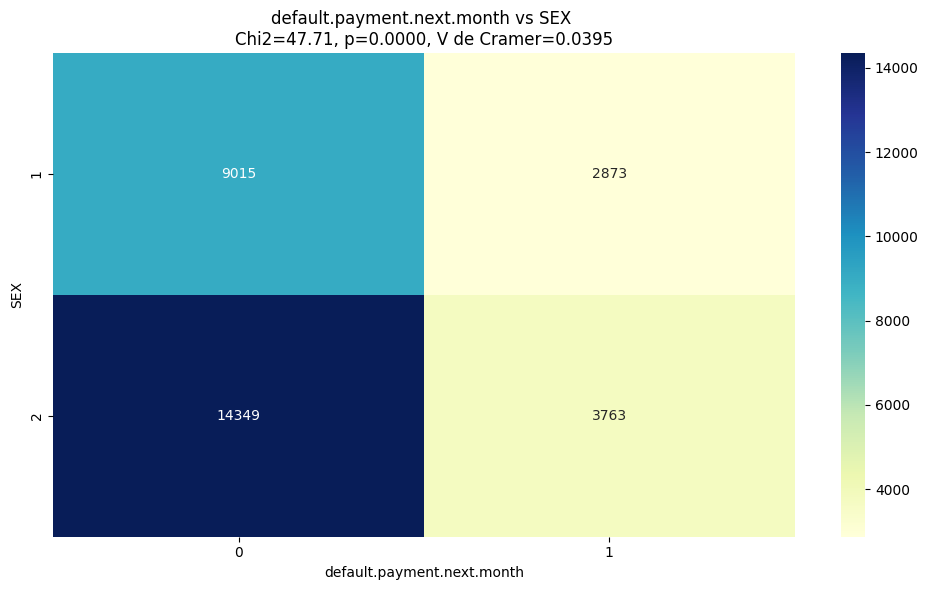


Variable: EDUCATION
Tableau de contingence :
default.payment.next.month      0     1
EDUCATION                              
0                              14     0
1                            8549  2036
2                           10700  3330
3                            3680  1237
4                             116     7
5                             262    18
6                              43     8
Chi2 = 163.2166, p-value = 0.0000, degrés de liberté = 6
V de Cramer = 0.0724


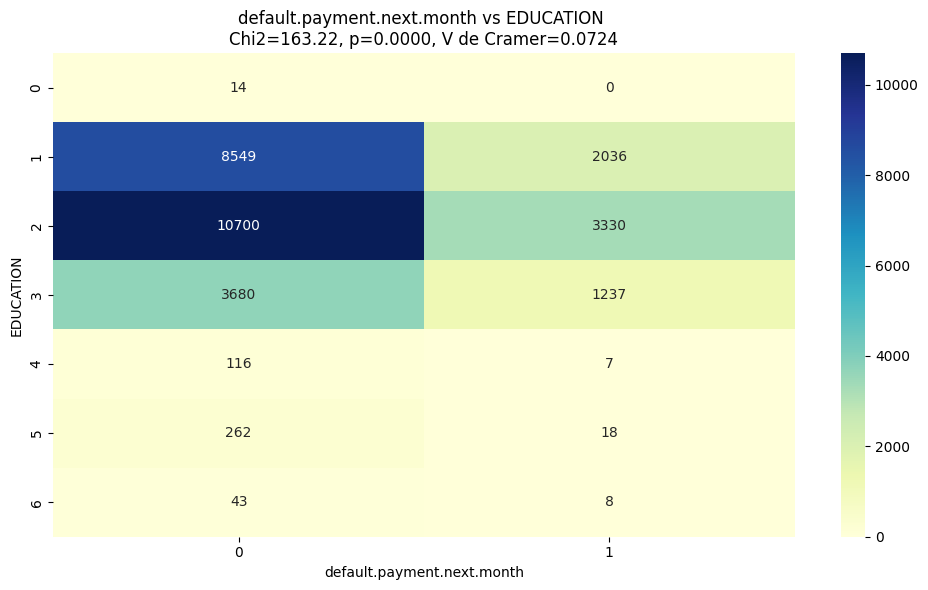


Variable: MARRIAGE
Tableau de contingence :
default.payment.next.month      0     1
MARRIAGE                               
0                              49     5
1                           10453  3206
2                           12623  3341
3                             239    84
Chi2 = 35.6624, p-value = 0.0000, degrés de liberté = 3
V de Cramer = 0.0330


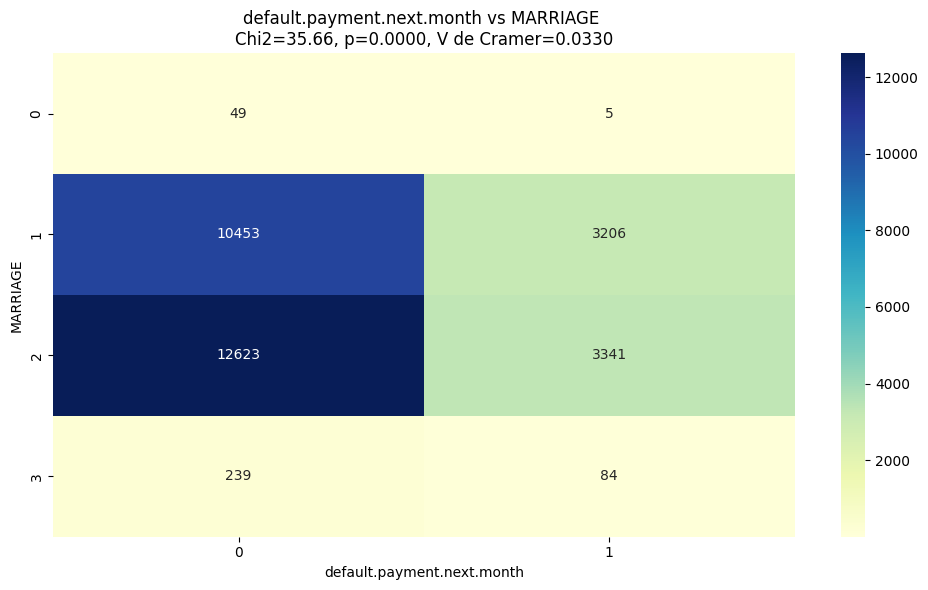


Variable: PAY_0
Tableau de contingence :
default.payment.next.month      0     1
PAY_0                                  
-2                           2394   365
-1                           4732   954
 0                          12849  1888
 1                           2436  1252
 2                            823  1844
 3                             78   244
 4                             24    52
 5                             13    13
 6                              5     6
 7                              2     7
 8                              8    11
Chi2 = 5365.9650, p-value = 0.0000, degrés de liberté = 10
V de Cramer = 0.4225


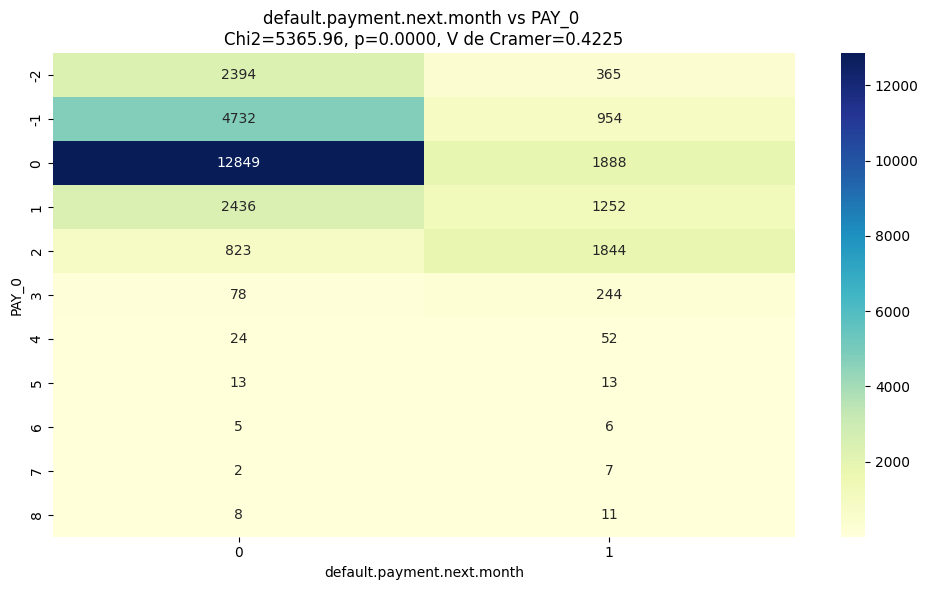


Variable: PAY_2
Tableau de contingence :
default.payment.next.month      0     1
PAY_2                                  
-2                           3091   691
-1                           5084   966
 0                          13227  2503
 1                             23     5
 2                           1743  2184
 3                            125   201
 4                             49    50
 5                             10    15
 6                              3     9
 7                              8    12
 8                              1     0
Chi2 = 3474.4668, p-value = 0.0000, degrés de liberté = 10
V de Cramer = 0.3398


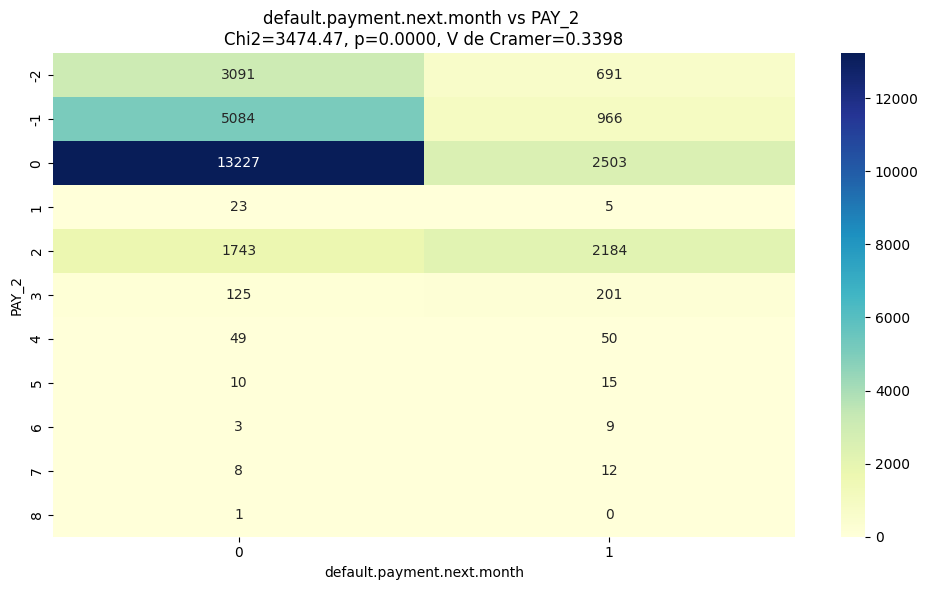


Variable: PAY_3
Tableau de contingence :
default.payment.next.month      0     1
PAY_3                                  
-2                           3328   757
-1                           5012   926
 0                          13013  2751
 1                              3     1
 2                           1850  1969
 3                            102   138
 4                             32    44
 5                              9    12
 6                              9    14
 7                              5    22
 8                              1     2
Chi2 = 2622.4621, p-value = 0.0000, degrés de liberté = 10
V de Cramer = 0.2951


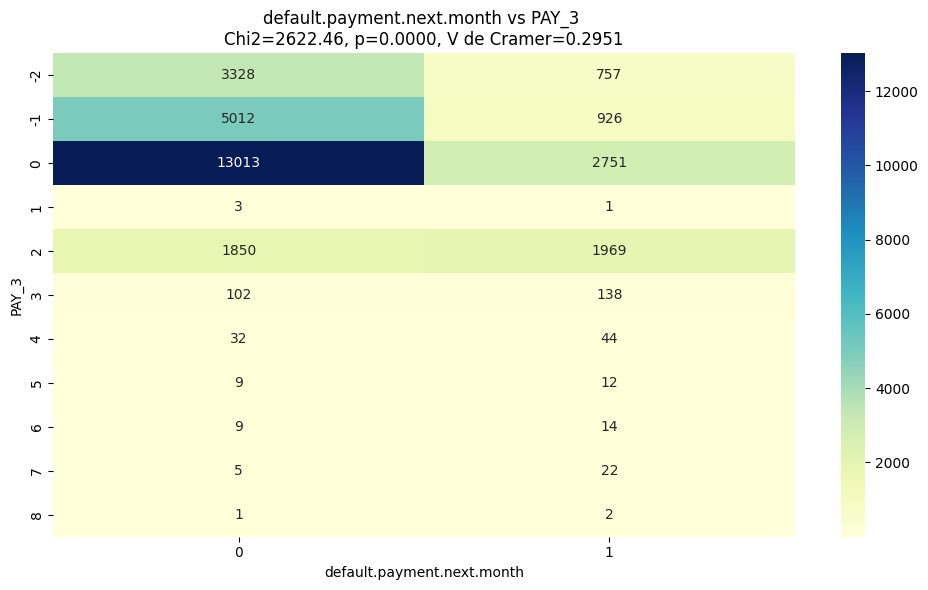


Variable: PAY_4
Tableau de contingence :
default.payment.next.month      0     1
PAY_4                                  
-2                           3511   837
-1                           4783   904
 0                          13439  3016
 1                              1     1
 2                           1506  1653
 3                             70   110
 4                             23    46
 5                             17    18
 6                              3     2
 7                             10    48
 8                              1     1
Chi2 = 2341.4699, p-value = 0.0000, degrés de liberté = 10
V de Cramer = 0.2788


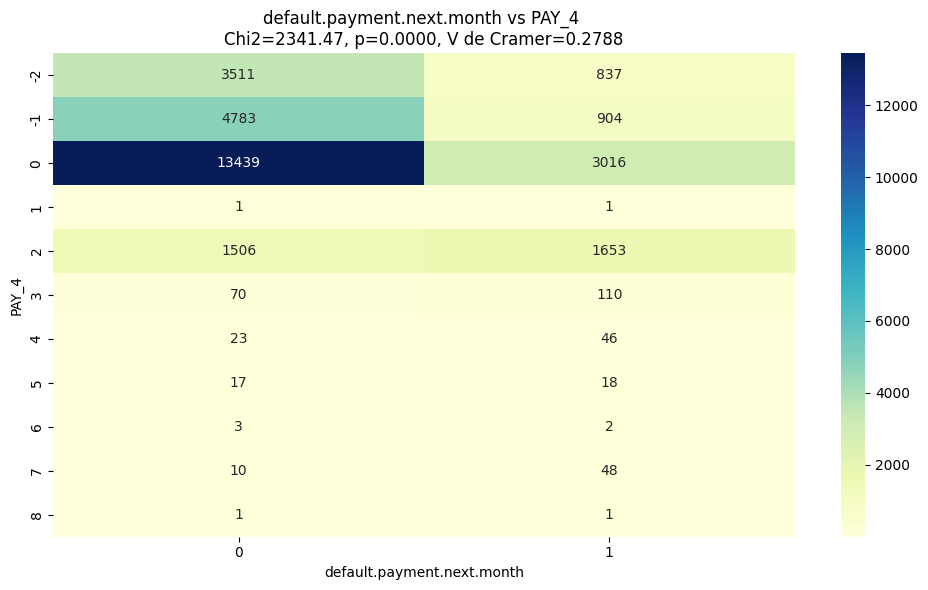


Variable: PAY_5
Tableau de contingence :
default.payment.next.month      0     1
PAY_5                                  
-2                           3651   895
-1                           4642   897
 0                          13752  3195
 2                           1203  1423
 3                             65   113
 4                             33    51
 5                              7    10
 6                              1     3
 7                             10    48
 8                              0     1
Chi2 = 2197.6949, p-value = 0.0000, degrés de liberté = 9
V de Cramer = 0.2701


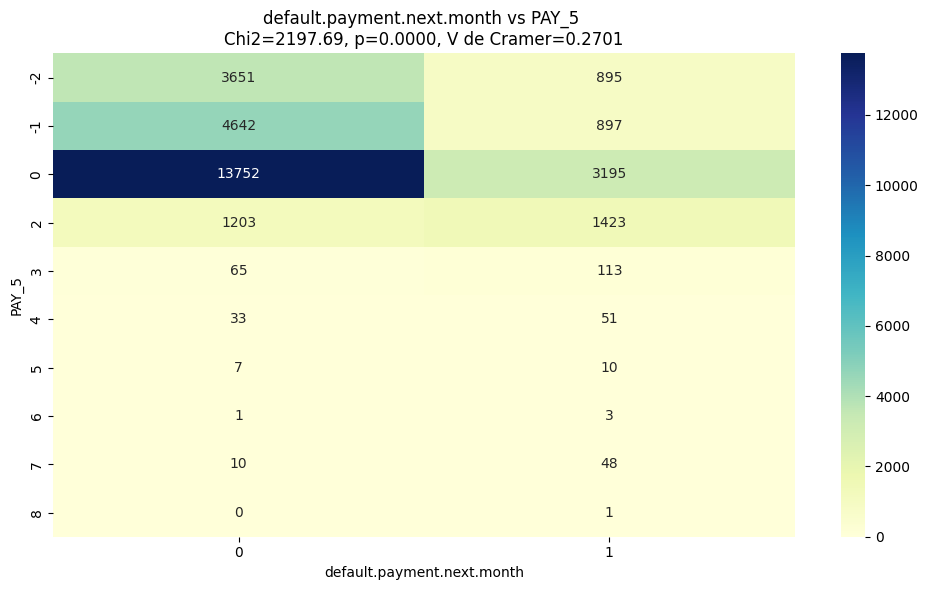


Variable: PAY_6
Tableau de contingence :
default.payment.next.month      0     1
PAY_6                                  
-2                           3914   981
-1                           4765   975
 0                          13217  3069
 2                           1365  1401
 3                             66   118
 4                             18    31
 5                              6     7
 6                              5    14
 7                              8    38
 8                              0     2
Chi2 = 1886.8353, p-value = 0.0000, degrés de liberté = 9
V de Cramer = 0.2502


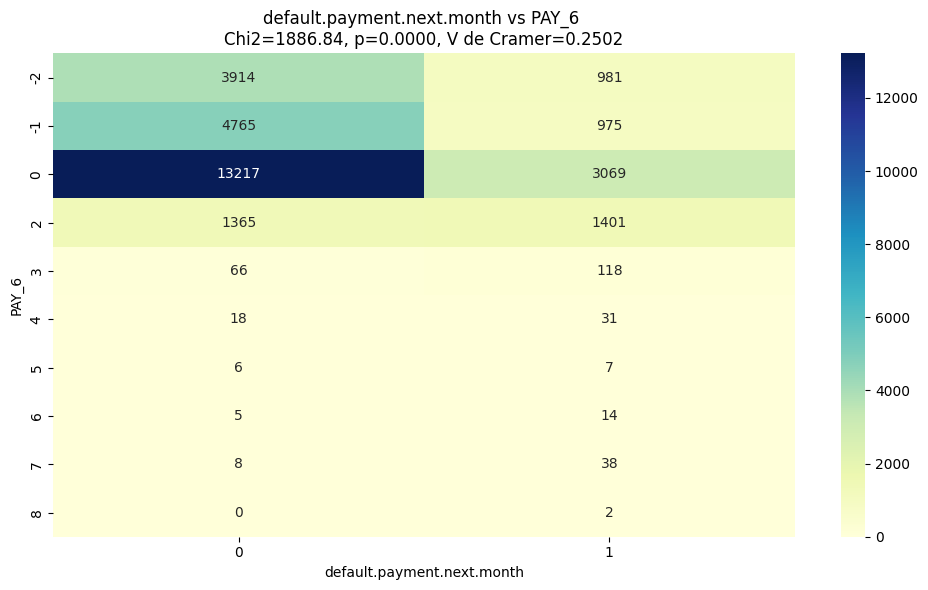


Variable: default.payment.next.month
Tableau de contingence :
default.payment.next.month      0     1
default.payment.next.month             
0                           23364     0
1                               0  6636
Chi2 = 29994.1955, p-value = 0.0000, degrés de liberté = 1
V de Cramer = 0.9999


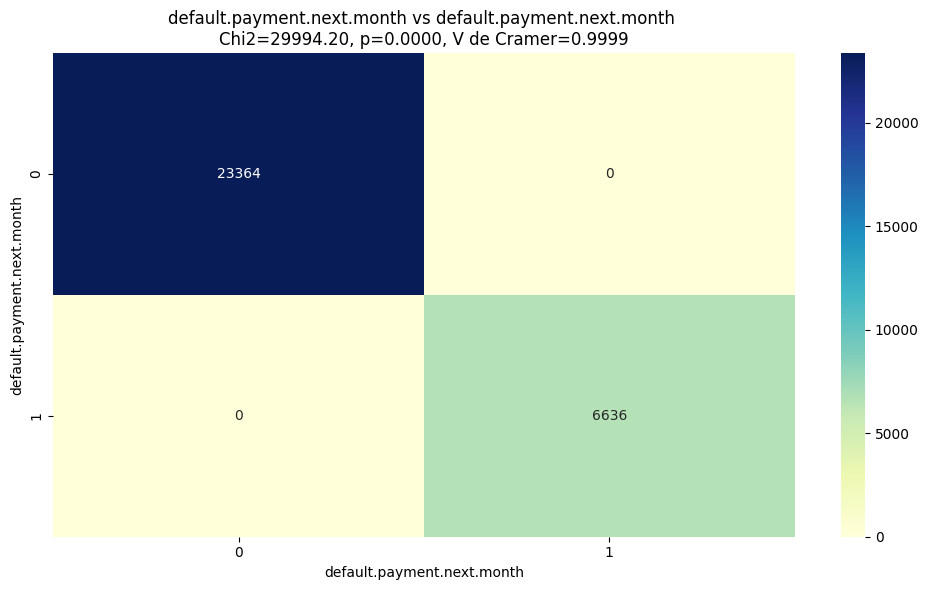

In [86]:
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
target_column = 'default.payment.next.month'

# Fonction pour calculer le V de Cramer
def cramers_v(confusion_matrix):
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))  # correction pour les petits échantillons
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Boucle sur chaque variable catégorielle
for var in cat_var:
    print(f"\nVariable: {var}")
    
    # Tableau de contingence
    contingency_table = pd.crosstab(data[var], data[target_column])
    print("Tableau de contingence :")
    print(contingency_table)
    
    # Test du khi2
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # V de Cramer
    v_cramer = cramers_v(contingency_table)
    
    print(f"Chi2 = {chi2:.4f}, p-value = {p_value:.4f}, degrés de liberté = {dof}")
    print(f"V de Cramer = {v_cramer:.4f}")
    
    # Graphique : Heatmap du tableau de contingence
    plt.figure(figsize=(10, 6))
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'default.payment.next.month vs {var} \nChi2={chi2:.2f}, p={p_value:.4f}, V de Cramer={v_cramer:.4f}')
    plt.xlabel('default.payment.next.month')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

In [87]:
df = data.copy()

In [88]:
X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_train.shape, X_test.shape


((18000, 23), (12000, 23))

In [90]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)
X_val.shape, X_test.shape


((6000, 23), (6000, 23))

In [91]:
pd.DataFrame(y).value_counts(normalize=True)


default.payment.next.month
0                             0.7788
1                             0.2212
Name: proportion, dtype: float64

In [92]:
pd.DataFrame(y_test).value_counts(normalize=True)

default.payment.next.month
0                             0.778833
1                             0.221167
Name: proportion, dtype: float64

In [93]:
pd.DataFrame(y_val).value_counts(normalize=True)


default.payment.next.month
0                             0.778833
1                             0.221167
Name: proportion, dtype: float64

In [96]:
cat_features = ['SEX', 'EDUCATION', 'MARRIAGE']

num_features = [c for c in X_train.columns if c not in cat_features]

In [109]:
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])


num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

rf_model = RandomForestClassifier(random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])


In [110]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'AGE', 'PAY_0',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [111]:
def model_evaluation(model, features, labels):
    pred = model.predict(features)
    print(classification_report(labels, pred))


def conf_mat(model, features, labels):
        cm = confusion_matrix(labels,  model.predict(features))

        # 👉 Affichage en heatmap
        plt.figure(figsize=(6,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Prédictions')
        plt.ylabel('Valeurs Réelles')
        plt.title('Matrice de Confusion')
        plt.show()

def courbe_roc(model, features, labels,features_val, labels_val):
      
    # Courbe ROC pour le jeu de données test
    # Courbe ROC
    y_train_pred_prob = model.predict_proba(features)[:,1]
    y_test_pred_prob = model.predict_proba(features_val)[:,1]

    fpr_test, tpr_test, _ = roc_curve(labels_val, y_test_pred_prob)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Courbe ROC pour le jeu de données d'entraînement
    fpr_train, tpr_train, _ = roc_curve(labels, y_train_pred_prob)
    roc_auc_train = auc(fpr_train, tpr_train)

    # Affichage des courbes ROC
    plt.figure()
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f) Test' % roc_auc_test)
    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (area = %0.2f) Train' % roc_auc_train)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()



In [115]:
recall_score(y_val, pipeline.predict(X_val))

0.3262999246420497

In [116]:
model_evaluation(pipeline, X_val, y_val)


              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.63      0.33      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.64      0.66      6000
weighted avg       0.79      0.81      0.78      6000



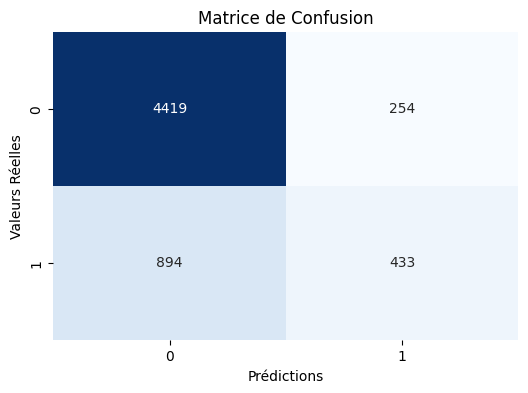

In [117]:
conf_mat(pipeline, X_val, y_val)

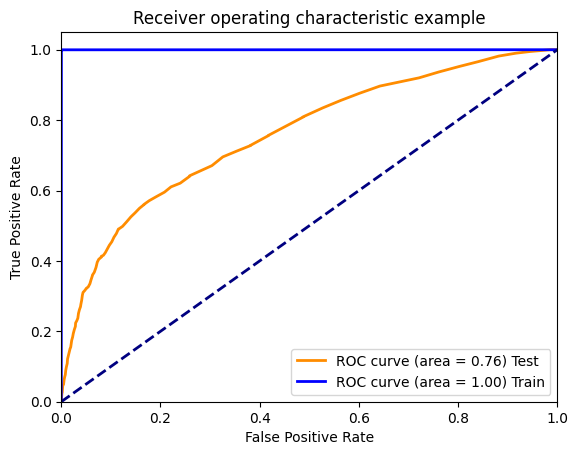

In [118]:
courbe_roc(pipeline, X_train, y_train,X_val, y_val)
      